#Task
Na vstupe máte video diaľničnej premávky. Vašou úlohou je nájsť snímku, na ktorej sa nachádza najviac áut v pravom dolnom rohu (definovaný od stredného bodu obrazu). Okrem snímky vypíšte aj to, v akom čase sa na snímke nachádza najviac áut (minúty a sekundy vo videu) a ich počet. Na snímke majte označené všetky autá.

The input is a video of traffic flow on a highway. Your task is to find the frame, on which the most cars can be seen in the lower right corner (with regard to the center of the image). Apart from visualizing the frame itself, print the timestamp when the frame occurs and the number of cars. Have all cars highlighted on the frame.

In [17]:
import time, numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import draw
from IPython import display
from skimage import morphology
from IPython.display import Video
from skimage.color import rgb2gray
import skimage
from skimage.measure import label, regionprops
import cv2
from skimage import morphology, filters


plt.rc('font', **{'family' : 'DejaVu Sans', 'weight' : 'normal'})
plt.rcParams['font.size'] = 18

In [5]:
path = '/content/traffic_small_small.mp4'

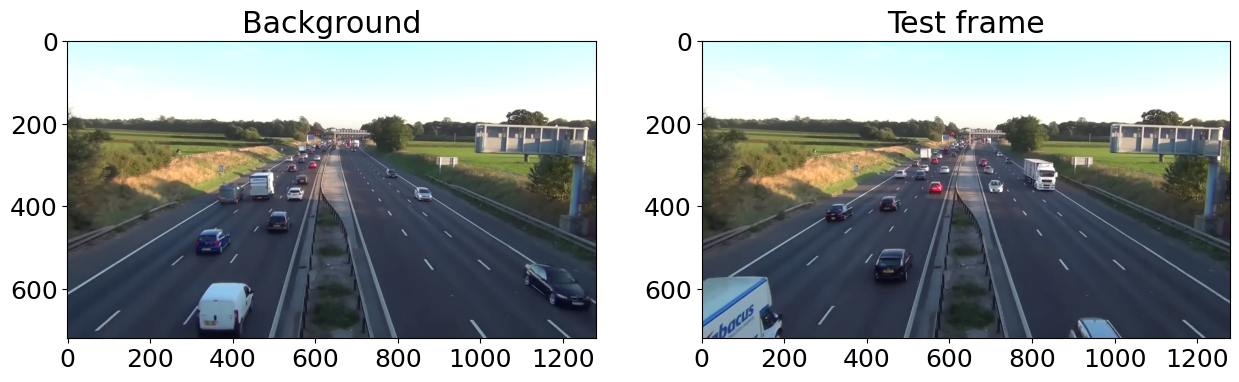

In [6]:
# Open the video capture object
cap = cv2.VideoCapture(path)

# Set the position of the video capture to frame 119 (change the frame number accordingly)
cap.set(cv2.CAP_PROP_POS_FRAMES, 119)

# Read the frame at position 119, which will be used as the background image
_, background_image = cap.read()

# Set the position of the video capture to frame 23 (change the frame number accordingly)
cap.set(cv2.CAP_PROP_POS_FRAMES, 23)

# Read the frame at position 23, which will be used as the test frame with cars
_, image_with_cars = cap.read()

# Display the background and test frames side by side using matplotlib
plt.figure(figsize=(15, 10))

# Plotting the background image
plt.subplot(121)
plt.title("Background")
B, G, R = cv2.split(background_image) # Merge the channels in the order B, G, R
background_image = cv2.merge([R, G, B])
plt.imshow(background_image)

# Plotting the test frame with cars
plt.subplot(122)
plt.title("Test frame")
B, G, R = cv2.split(image_with_cars) # Merge the channels in the order B, G, R
image_with_cars = cv2.merge([R, G, B])
plt.imshow(image_with_cars)

# Show the matplotlib plot
plt.show()

# Close the video capture object
cap.release()

In [8]:
# Open the video capture object
cap = cv2.VideoCapture(path)

# Get the frame width of the video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))

# Get the frame height of the video
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Get the total number of frames in the video
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Get the frames per second (fps) of the video
fps = cap.get(cv2.CAP_PROP_FPS)

# Print the obtained video properties
print("Frame width:", width)
print("Frame height:", height)
print("Length (frames count):", length)
print("Frames per second:", fps)

Frame width: 1280
Frame height: 720
Length (frames count): 6104
Frames per second: 25.0


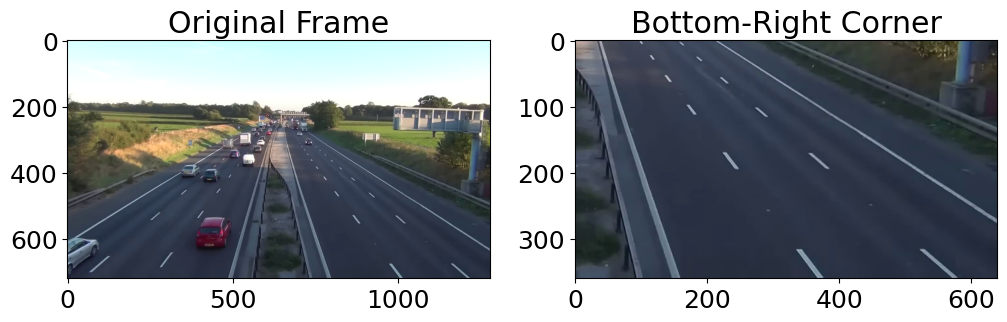

In [9]:
# Open the video capture object
cap = cv2.VideoCapture(path)

# Check if the video was successfully opened
if not cap.isOpened():
    print("Error: Failed to open the video")
    exit()

# Choose the frame number to read
frame_number = 200
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

# Read the specified frame
ret, frame = cap.read()

# Check if the frame was successfully read
if not ret:
    print(f"Error: Failed to read frame {frame_number}")
    cap.release()
    exit()

# Get the frame dimensions
height, width = frame.shape[:2]

# Define the starting coordinates for the region of interest (ROI)
x_start, y_start = width // 2, height // 2  # Center of the frame

# Extract the Region of Interest (ROI) from the frame (bottom-right quarter)
background_image = frame[y_start:height, x_start:width]

# Display the original frame and the ROI
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.title("Original Frame")
# Convert BGR to RGB for displaying with matplotlib
B, G, R = cv2.split(frame)
frame_rgb = cv2.merge([R, G, B])
plt.imshow(frame_rgb)

plt.subplot(122)
plt.title("Bottom-Right Corner")
# Convert BGR to RGB for displaying with matplotlib
B, G, R = cv2.split(background_image)
roi_rgb = cv2.merge([R, G, B])
plt.imshow(roi_rgb)

plt.show()

# Release the video capture object
cap.release()

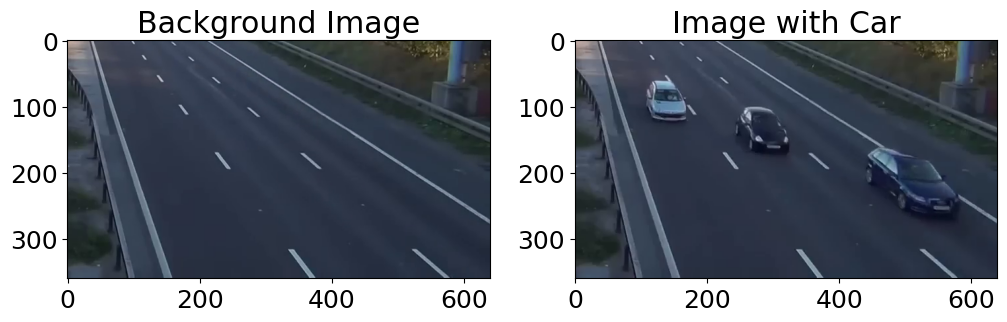

In [14]:
# Open the video file
cap = cv2.VideoCapture(path)

# Check if the video was successfully opened
if not cap.isOpened():
    print("Error: Unable to open the video")
    exit()

# Select the frame number to read, for example, the 5th frame
frame_number = 5
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

# Read the frame
ret, frame = cap.read()

# Check if the frame was successfully read
if not ret:
    print(f"Error: Unable to read frame {frame_number}")
    cap.release()
    exit()

# Coordinates of the bottom-right corner (lower right quarter)
height, width = frame.shape[:2]
x_start, y_start = width // 2, height // 2
image_with_cars = frame[y_start:height, x_start:width]

# Display the original frame and the bottom-right corner
plt.figure(figsize=(12, 6))

# Bottom-right corner frame
plt.subplot(121)
plt.title("Background Image")
B, G, R = cv2.split(background_image)
roi_rgb = cv2.merge([R, G, B])
plt.imshow(roi_rgb)

# Display frame with car
plt.subplot(122)
plt.title("Image with Car")
B, G, R = cv2.split(image_with_cars)
roi_with_car_rgb = cv2.merge([R, G, B])
plt.imshow(roi_with_car_rgb)

plt.show()

# Release the video capture object
cap.release()

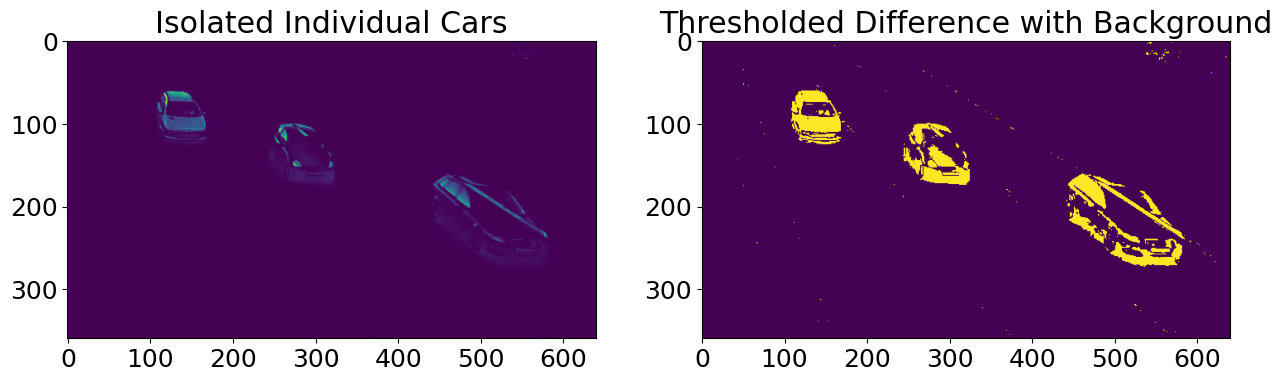

In [16]:
# Calculate the absolute difference between grayscale representations of background and image with cars
diff_image = np.abs(rgb2gray(background_image) - rgb2gray(image_with_cars))

# Threshold the difference image to create a binary mask
# Values greater than 30 are set to 255, representing significant differences
diff_thresholded = diff_image * 255 > 25

# Display the results using Matplotlib
plt.figure(figsize=(15, 10))

# Plot the thresholded difference image with a title
plt.subplot(121)
plt.title("Isolated Individual Cars")
plt.imshow(diff_image ** 2)

# Plot the squared difference image with a title
plt.subplot(122)
plt.title("Thresholded Difference with Background")
plt.imshow(diff_thresholded)

plt.show()

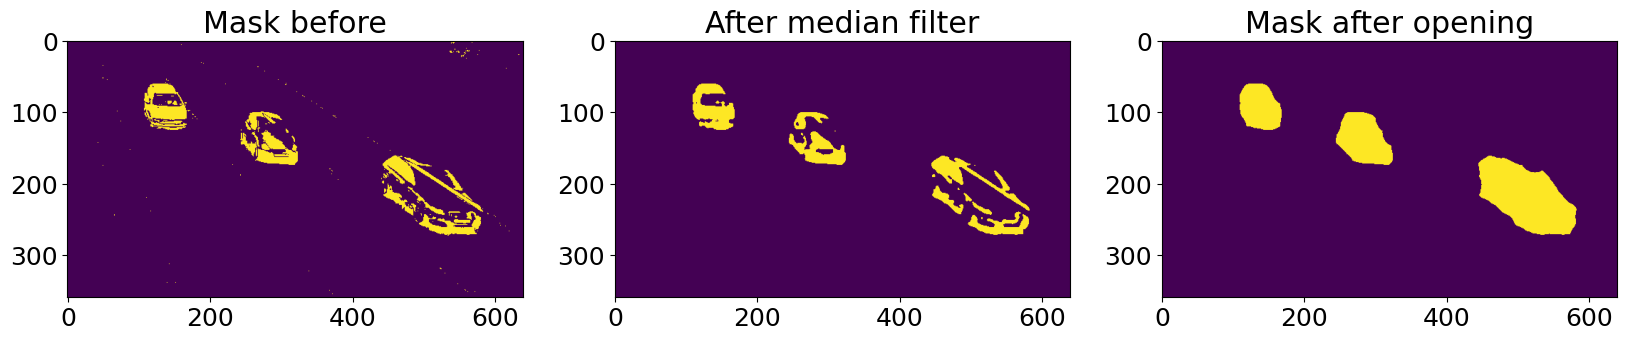

In [18]:
# Apply median filter before morphological operations
diff_thresholded_median = filters.median(diff_thresholded, morphology.disk(3))

# Create structuring elements
SEclosing = morphology.disk(20)
SEopening = morphology.disk(10)

# Apply morphological operations
diff_thresholded_processed = morphology.opening(diff_thresholded_median, SEopening)
diff_thresholded_processed = morphology.closing(diff_thresholded_median, SEclosing)

# Display images before and after processing
plt.figure(figsize=(20, 10))

# Original mask
plt.subplot(131)
plt.title("Mask before")
plt.imshow(diff_thresholded)

# After median filtering
plt.subplot(132)
plt.title("After median filter")
plt.imshow(diff_thresholded_median)

# After morphological opening
plt.subplot(133)
plt.title("Mask after opening")
plt.imshow(diff_thresholded_processed)

plt.show()

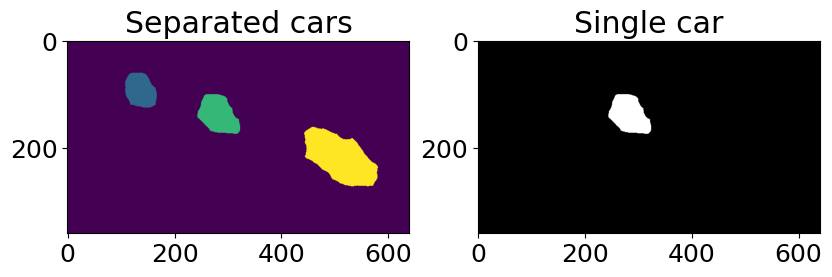

[0 1 2 3]


In [19]:
# Label connected components in the processed thresholded difference image
label_img = label(diff_thresholded_processed, connectivity=1.5)

# Create a binary mask for objects with ID 6 (for example), indexes are assigned randomly
selected_objects = (label_img == 2)

# Display the original thresholded difference image
plt.figure(figsize=(15, 10))

# Plot the labeled image with all objects
plt.subplot(132)
plt.title("Separated cars")
plt.imshow(label_img, cmap='viridis')

# Plot the labeled image with only objects of ID 1
plt.subplot(133)
plt.title("Single car")
plt.imshow(selected_objects, cmap='gray')

# Show the matplotlib plot
plt.show()

# Print all indexes
print(np.unique(label_img))

<Figure size 1500x1000 with 0 Axes>

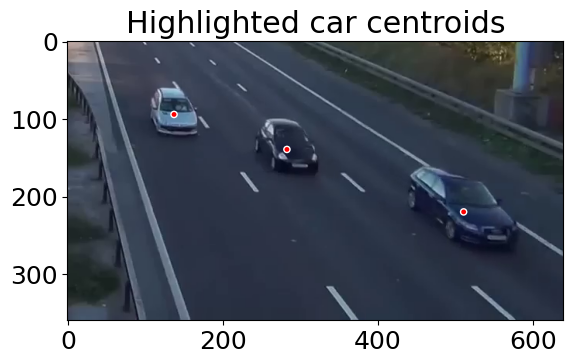

In [20]:
# Set up the figure and axis for plotting
plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(1)
ax.set_title("Highlighted car centroids")  # Set the title of the plot
ax.imshow(roi_with_car_rgb)  # Display the original image with cars

# Get region properties for labeled objects in the image
regions = skimage.measure.regionprops(label_img)

# Iterate over each labeled region in the image
for index, region in enumerate(regions):
  # Create a visualization of the centroid using a circle patch
  centroid_viz = patches.Circle((region.centroid[1], region.centroid[0]), radius=4, edgecolor='white', facecolor='red')

  # Add the centroid visualization to the plot
  ax.add_patch(centroid_viz)

# Show the matplotlib plot
plt.show()

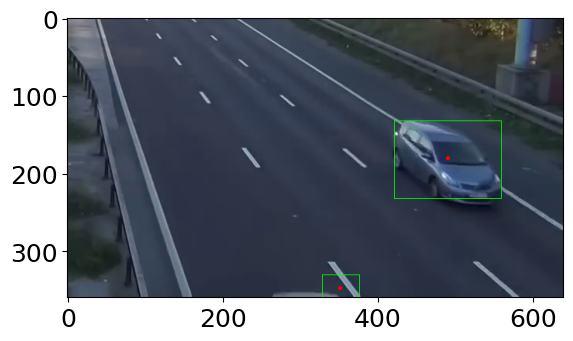

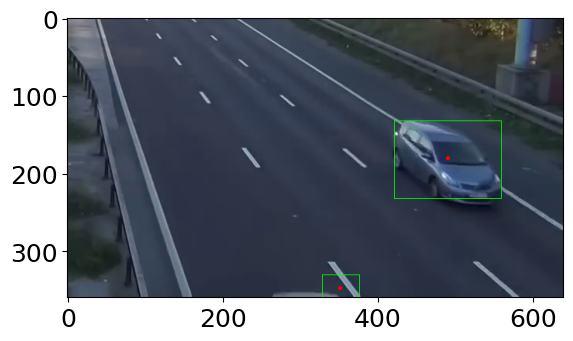

In [41]:
# Open the video file
cap = cv2.VideoCapture(path)

# Check if the video was successfully opened
if not cap.isOpened():
    print("Error: Unable to open video")
    exit()

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Initialize a dictionary to store the count of cars in each processed frame
cars_count = {}
frames_images = {} # for vizualizating

# Set the background image (assumed to be pre-defined)
background_image = roi_rgb

# Create structuring elements for morphological operations
SEclosing = morphology.disk(20)
SEopening = morphology.disk(10)

# Define the interval for frame processing (e.g., process every 5th frame)
frame_interval = 25
current_frame = 0

while cap.isOpened():
    # Set the position of the next frame to read
    cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
    ret, frame = cap.read()
    if not ret:
        break

    # Testing code
    # if current_frame >= 30: break

    # Extract the bottom-right quarter of the frame
    x_start, y_start = width // 2, height // 2
    image_with_car = frame[y_start:height, x_start:width]

    # Convert the extracted region to RGB format
    B, G, R = cv2.split(image_with_car)
    frame_rgb = cv2.merge([R, G, B])

    # Compute the absolute difference between the background and current frame in grayscale
    diff_image = np.abs(rgb2gray(background_image) - rgb2gray(frame_rgb))

    # Threshold the difference image to create a binary mask
    diff_thresholded = diff_image * 255 > 35

    # Apply median filtering to reduce noise
    diff_thresholded_processed = filters.median(diff_thresholded, morphology.disk(3))

    # Perform morphological closing and opening to remove small artifacts
    diff_thresholded_processed = morphology.closing(diff_thresholded_processed, SEclosing)
    diff_thresholded_processed = morphology.opening(diff_thresholded_processed, SEopening)

    # Label connected components in the processed binary image
    label_img = skimage.measure.label(diff_thresholded_processed, connectivity=1.5)

    # Get properties of labeled regions
    regions = skimage.measure.regionprops(label_img)

    # Store the count of detected regions (assumed to be cars) for the current frame
    cars_count[current_frame] = len(regions)

    # Draw bounding boxes and centroids for each detected region
    for region in regions:
        minr, minc, maxr, maxc = region.bbox
        local_centroid = (int(region.centroid[1]), int(region.centroid[0]))
        cv2.rectangle(frame_rgb, (minc, minr), (maxc, maxr), (0, 255, 0), 1)
        cv2.circle(frame_rgb, local_centroid, 1, (255, 0, 0), 2)

    # Store frames for vizualization
    frames_images[current_frame] = frame_rgb.copy()

    # Display the processed frame
    plt.imshow(frame_rgb)
    plt.draw()
    display.clear_output(wait=True)
    display.display(plt.gcf())

    # Move to the next frame to process
    current_frame += frame_interval

# Release the video capture object
cap.release()

Frame with the maximum number of cars: 375 (7 cars)
Time: 15.00 seconds


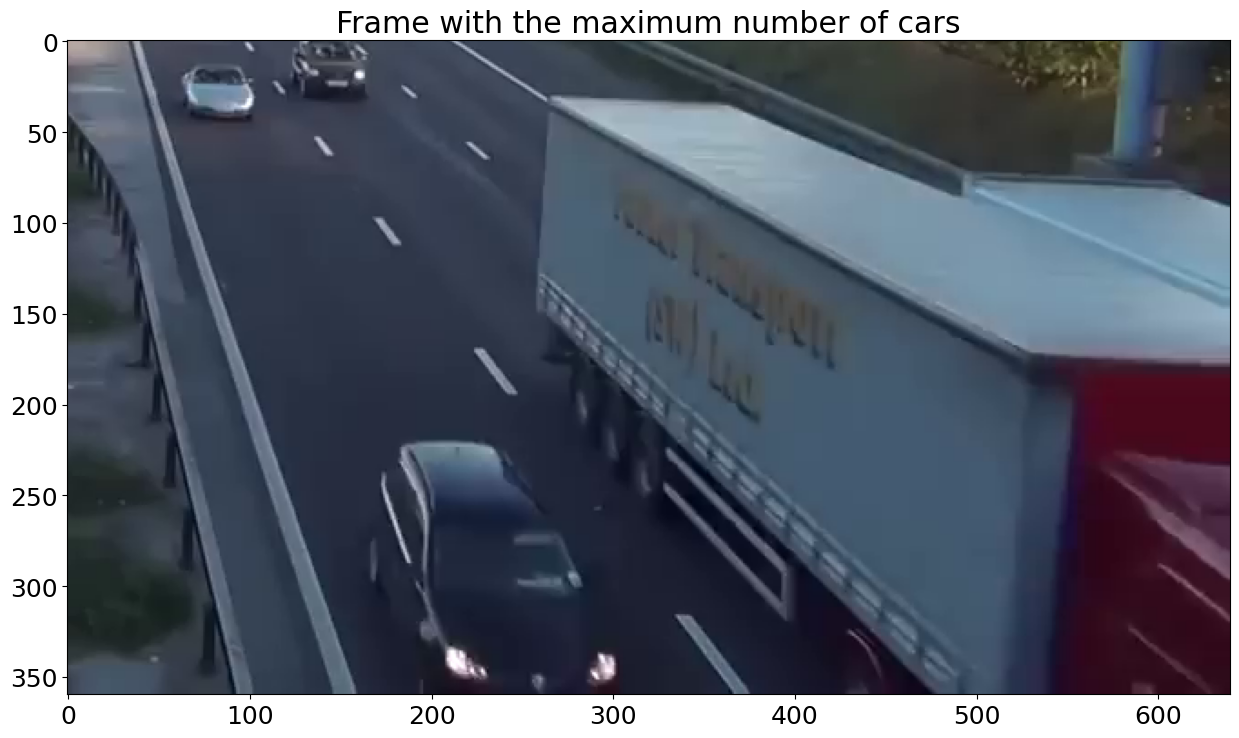

In [42]:
# Determine the frame with the maximum number of cars detected
max_frame = max(cars_count, key=cars_count.get)

# Retrieve the count of cars in that frame
max_cars = cars_count[max_frame]

# Calculate the corresponding time in seconds
time_seconds = max_frame / fps

# Display the results
print(f"Frame with the maximum number of cars: {max_frame} ({max_cars} cars)")
print(f"Time: {time_seconds:.2f} seconds")

# Open the video capture object
cap = cv2.VideoCapture(path)

# Set the position of the video capture to frame max_frame
cap.set(cv2.CAP_PROP_POS_FRAMES, max_frame)

# Read the frame at position 119, which will be used as the background image
_, frame = cap.read()

# Get the frame dimensions
height, width = frame.shape[:2]

# Define the starting coordinates for the region of interest (ROI)
x_start, y_start = width // 2, height // 2  # Center of the frame

# Extract the Region of Interest (ROI) from the frame (bottom-right quarter)
result_image = frame[y_start:height, x_start:width]

# Convert image to rgb
B, G, R = cv2.split(result_image)
result_image = cv2.merge([R, G, B])

# Visualization of the result
plt.figure(figsize=(15, 10))
plt.imshow(result_image)
plt.title("Frame with the maximum number of cars")
plt.show()

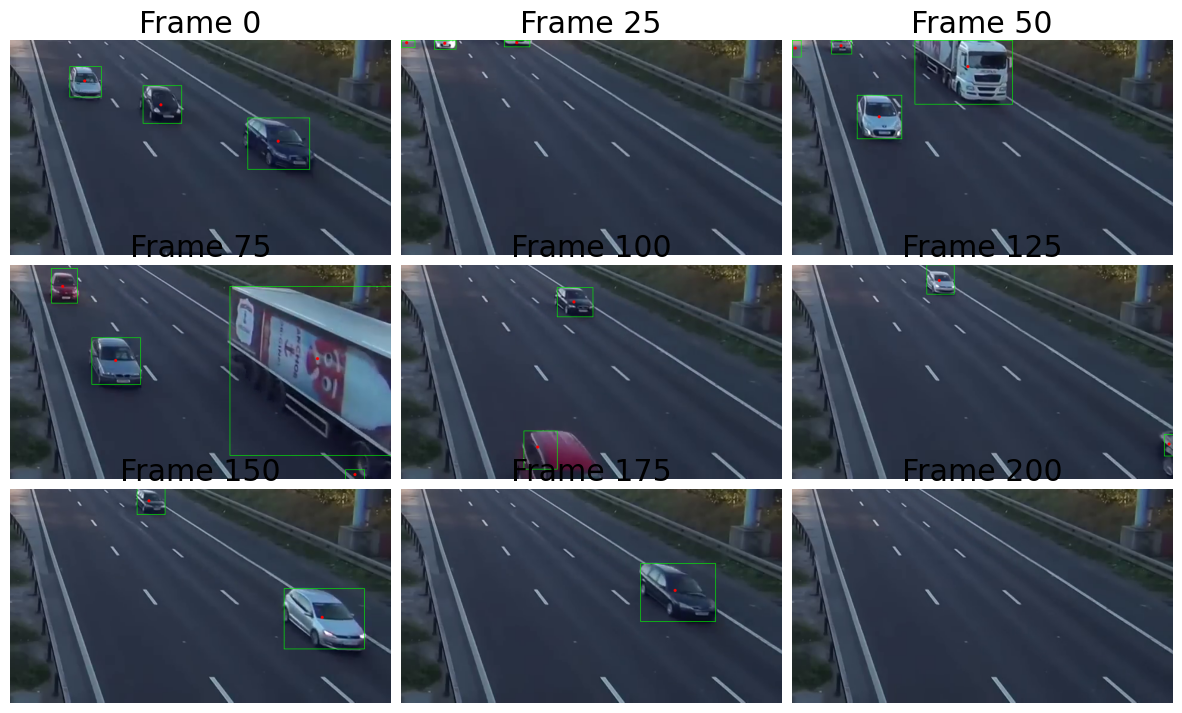

In [43]:
from mpl_toolkits.axes_grid1 import ImageGrid

grid_shape = (3, 3)
fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111, nrows_ncols=grid_shape, axes_pad=0.1)

for ax, (frame_num, frame) in zip(grid, frames_images.items()):
    ax.imshow(frame)
    ax.set_title(f"Frame {frame_num}")
    ax.axis('off')

plt.show()